Dataset loaded successfully!
Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

=== Data Exploration ===

Dat

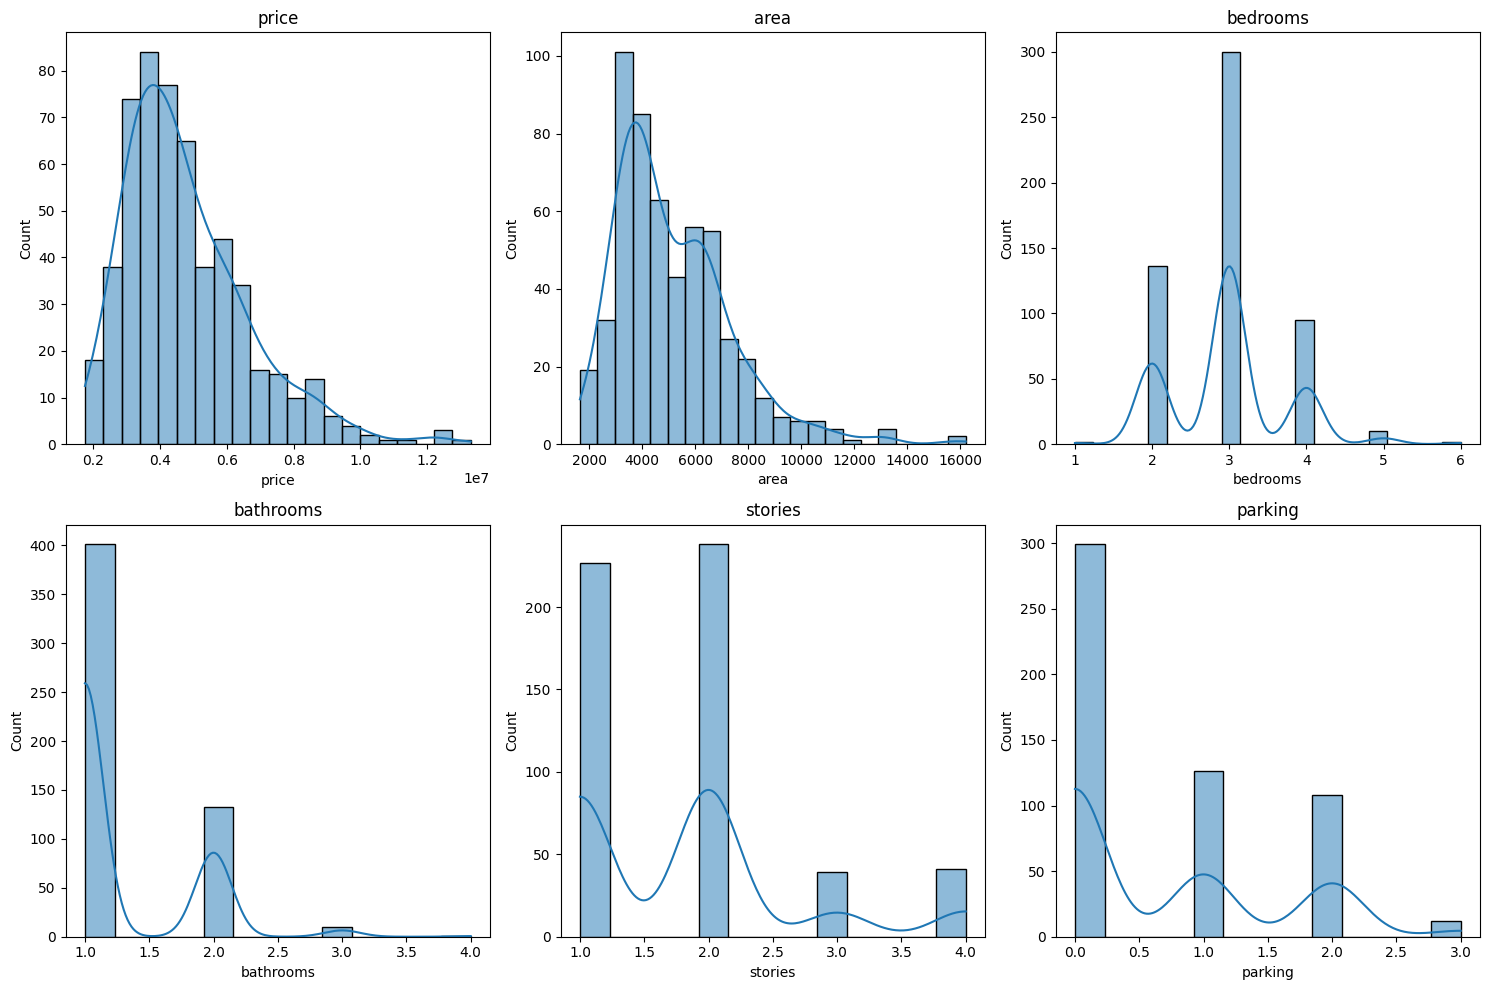

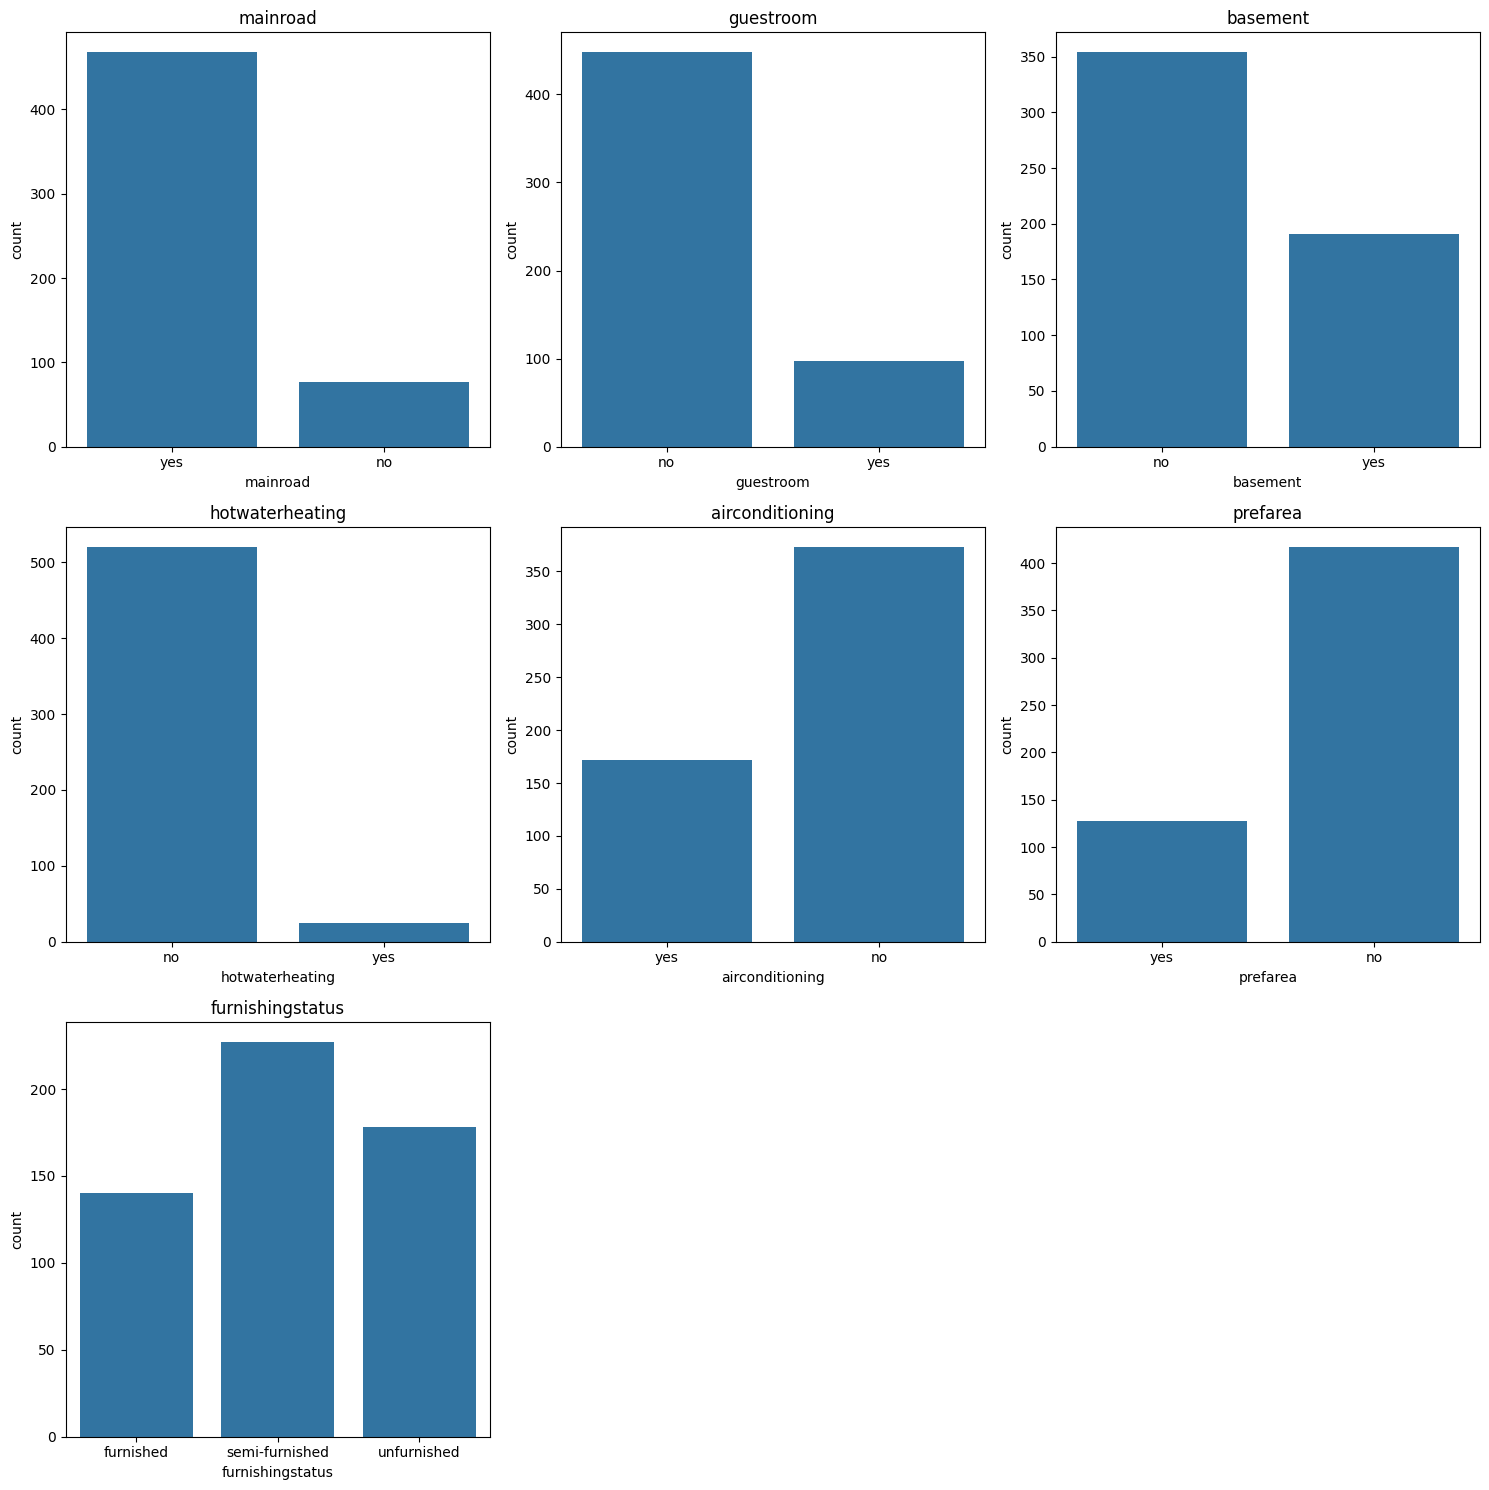

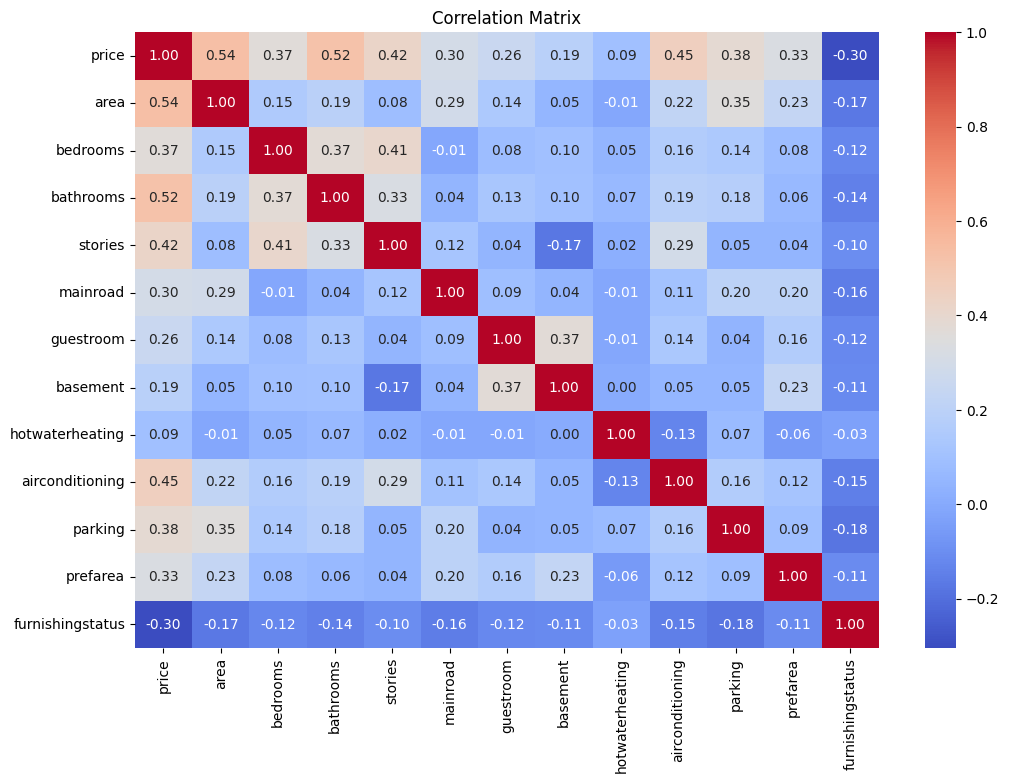


Correlation with price:
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

Model trained successfully!
Coefficients:
area: 550928.68
bathrooms: 569301.43
stories: 331824.35
airconditioning: 810091.45
parking: 209926.58
prefarea: 791252.89
furnishingstatus: -277526.83
Intercept: 4566521.30

Model Evaluation:
Mean Squared Error: 1943259073085.91
Root Mean Squared Error: 1394008.28
R-squared: 0.62


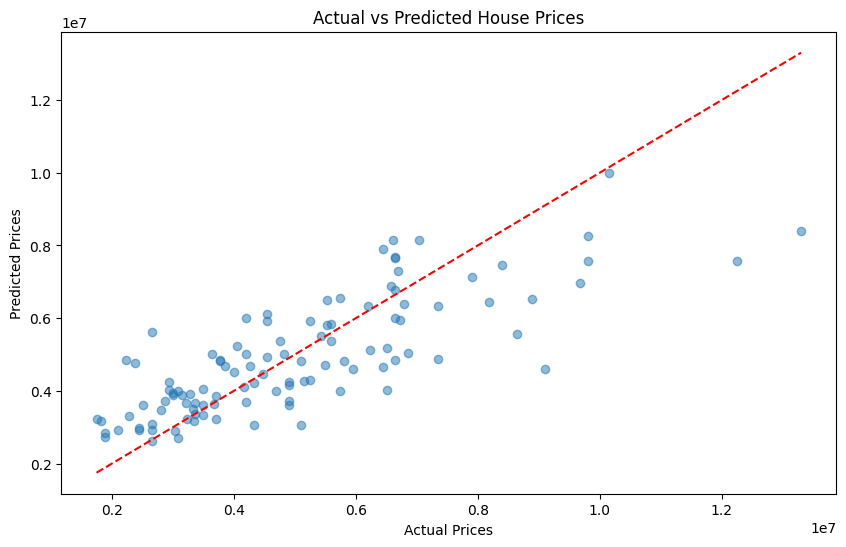

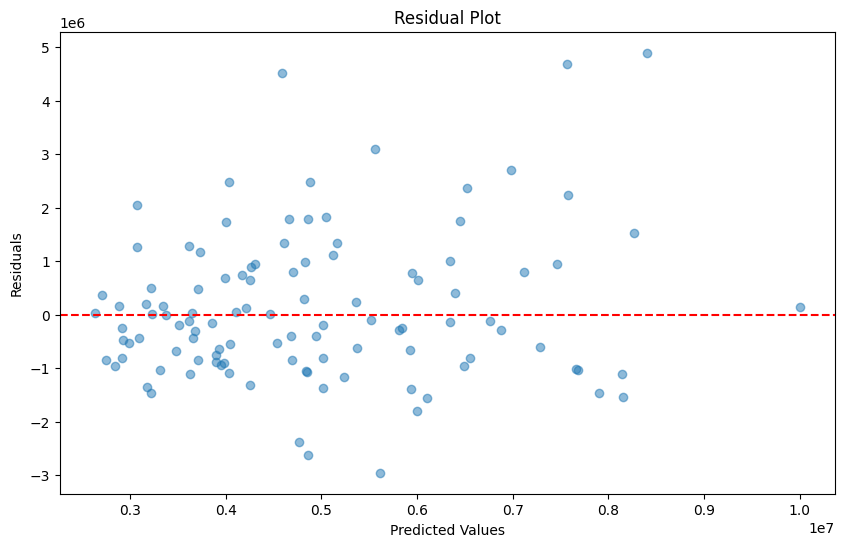

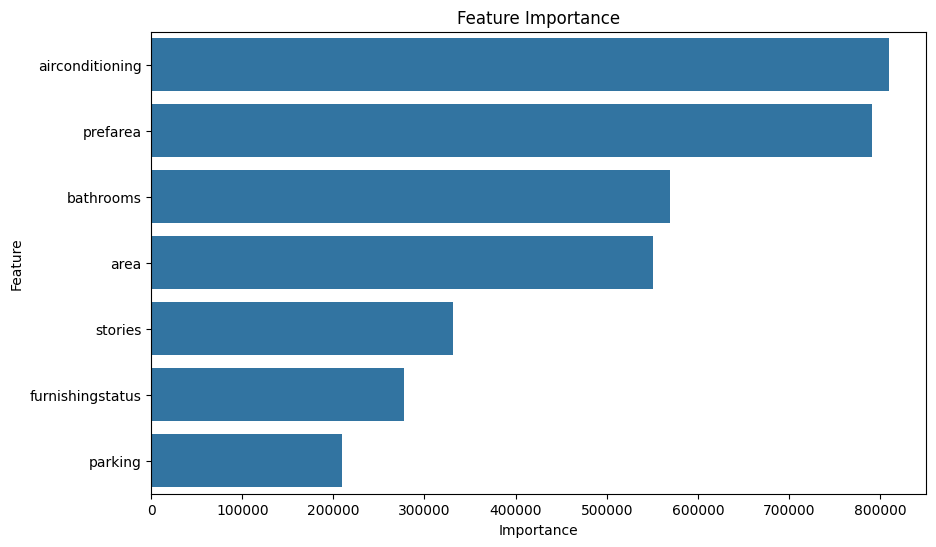

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Challenge 1: Data Collection
# Load the dataset
try:
    df = pd.read_csv('Housing.csv')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Challenge 2: Data Exploration and Cleaning
print("\n=== Data Exploration ===")
print("\nDataset information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nMissing values check:")
print(df.isnull().sum())

# Visualize distributions of numerical features
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualize categorical features
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Handle missing values if any (though dataset appears complete)
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Convert categorical variables to numerical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Challenge 3: Feature Selection
# Calculate correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Select features with high correlation to price
print("\nCorrelation with price:")
print(corr_matrix['price'].sort_values(ascending=False))

# Select features for modeling
selected_features = ['area', 'bathrooms', 'stories', 'airconditioning', 
                    'parking', 'prefarea', 'furnishingstatus']
X = df[selected_features]
y = df['price']

# Challenge 4: Model Training
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['area', 'bathrooms', 'stories', 'parking']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")
print("Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Challenge 5: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Challenge 6: Visualization
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature importance
importance = pd.DataFrame({'Feature': selected_features, 'Importance': np.abs(model.coef_)})
importance = importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()